In [26]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [49]:
data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()


This line handles the accessing of numbers of Keras datasets, splitting them into training and testing set. 

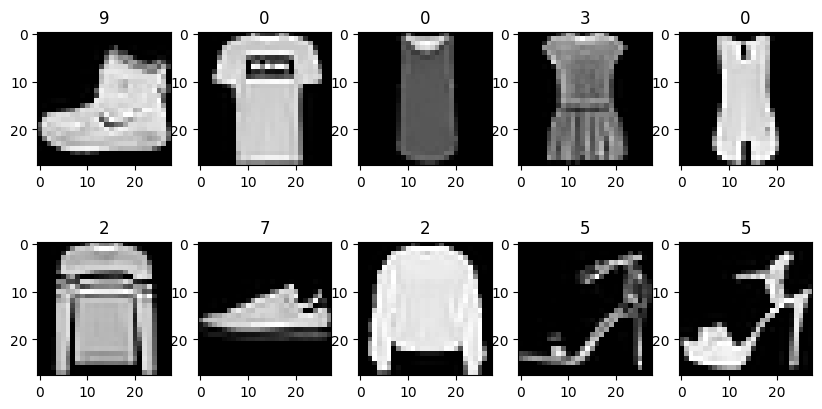

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5))
axs = axs.flatten()
#Flatten the axs from [2,5] dim to [10] for easier calling loop. 
for i in range(10):
    axs[i].imshow(training_images[i], cmap = 'gray')
    axs[i].set_title(training_labels[i])
plt.show()


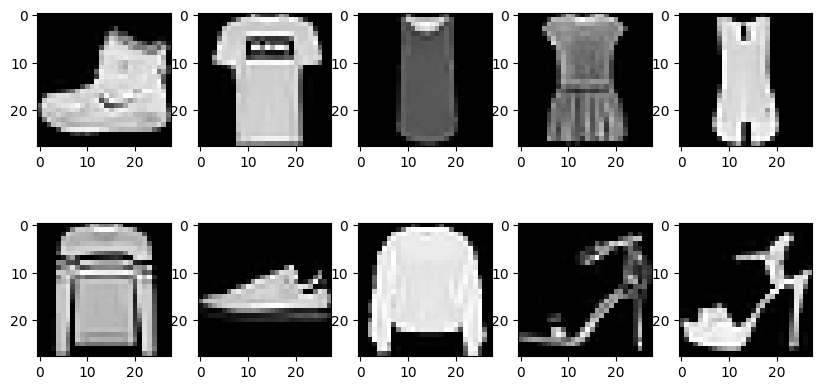

In [67]:
#Testing: Không flatten index của axs mà dùng 2 vòng lặp, show 10 hình ảnh đầu tiên
indices = np.arange(10).reshape(2,5)
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5))
for i in range(2):
    for j in range(5): 
        idx = indices[i,j]
        axs[i,j].imshow(training_images[idx], cmap = 'gray')

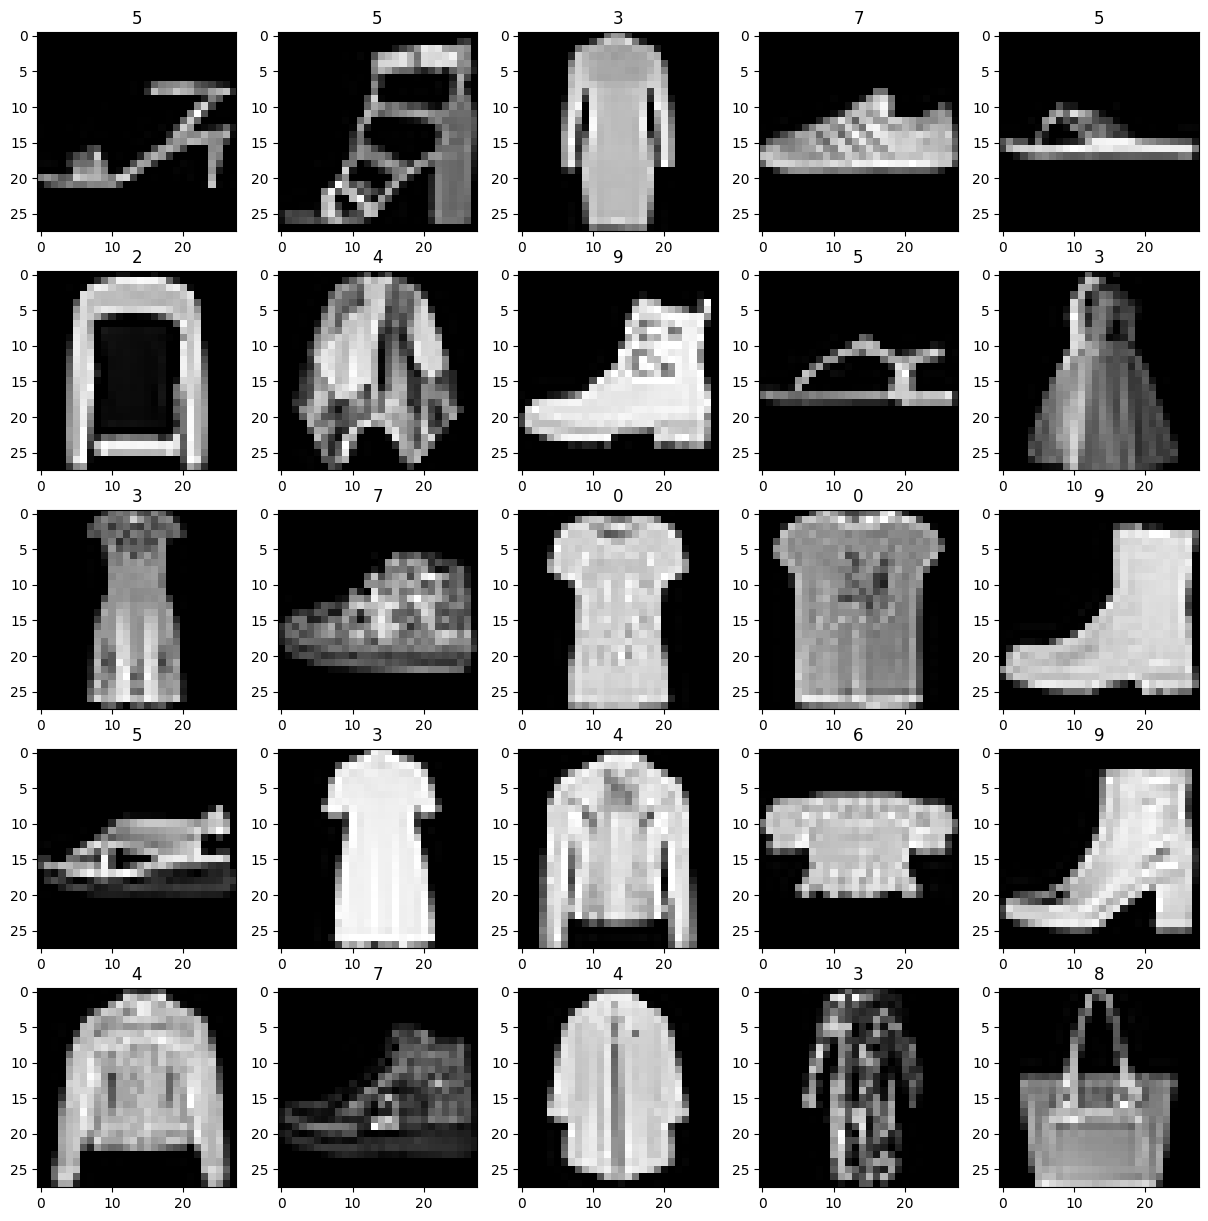

In [62]:
#show 25 random images from training set. 
fig, axs = plt.subplots(nrows = 5, ncols = 5, figsize = (15,15))
rng = np.random.default_rng(4)
indices = rng.choice(np.arange(len(training_images)), 25, replace = False).reshape(5,5)
for i in range(5): 
    for j in range(5): 
        idx = indices[i,j]
        axs[i,j].imshow(training_images[idx], cmap = 'gray')
        axs[i,j].set_title(training_labels[idx])

In [ ]:
print('training_images size:', training_images.shape[:])
print('test_images size:', test_images.shape[:])

training_images size: (60000, 28, 28)
test_images size: (10000, 28, 28)


In [5]:
training_images = training_images/255.0
test_images = test_images/255.0

All the images in the dataset are in gray-scale, with values ranges between 0 and 255. Dividing by 255 ensures the 0-1 representation of pixel values. This process is called **normalizing** the image

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [11]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

The used Loss function is called **Sparse categorical cross-entropy**. Here, we are picking a right category for prediction; therefore using categorical cross-entropy is a proper way to go. Besides, Adam optimizer is the evolution versions of Sgd (Stochastic Gradient Decent). Handling 60.000 training images need a good performance (fast) in training process.  

In [12]:
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7794 - loss: 0.6308
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8599 - loss: 0.3853
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8718 - loss: 0.3451
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8853 - loss: 0.3138
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8919 - loss: 0.2925


In [73]:
result = model.evaluate(test_images, test_labels)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8670 - loss: 0.3649


[0.369839072227478, 0.8647000193595886]

In [72]:
metrics = model.metrics_names
for i, m in enumerate(metrics):
  print(f"Kết quả đánh giá dựa trên {m}: {result[i]}")

Kết quả đánh giá dựa trên loss: 0.369839072227478
Kết quả đánh giá dựa trên compile_metrics: 0.8647000193595886


In [76]:
metrics

['loss', 'compile_metrics']

<h2> Stopping training </h2>

Sometimes, the limitation of training epochs is not what we want. We would like the accuracy rate on training set reachs 95%. This is when <span style = "color: orange">**Callback**</span> comes in.

In [23]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = Callback()
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'] 
              )
model.fit(test_images, test_labels, epochs = 50, callbacks= [callbacks])

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6102 - loss: 25.7694
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6698 - loss: 2.3045
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7050 - loss: 0.8355
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7190 - loss: 0.7339
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7368 - loss: 0.6965
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7392 - loss: 0.6863
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7429 - loss: 0.6801
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7762 - loss: 0.5909
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7675 - loss: 0.6036
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7674 - loss: 0.6390
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7768 - loss: 0.5918
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste